In [1]:
import ga_utils as g
import pandas as pd
import auth as auth
import matplotlib
from ggplot import *
import config as config
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# launch auth process
auth.main()

In [3]:
g.list_accounts()

,id,name
0,12138230,Tough Mudder Domain
1,20944990,Ode a la rose
2,40789744,Mudderella
3,61951480,Tough Mudder Gear


In [4]:
g.list_properties(20944990)

,accountId,id,name
0,20944990,UA-20944990-1,Ode a la rose - Live


In [5]:
g.list_profiles(20944990,"UA-20944990-1")

,accountId,id,name
0,20944990,41452992,1.4 - Historical Results
1,20944990,112718801,1.1 - Default
2,20944990,112834411,1.2 - Raw Data
3,20944990,113271648,1.3 - Cross Device


In [6]:
start_date = '2016-03-10'
end_date = '2016-05-11'

In [7]:
dfg = g.get_checkout_infos(config.profile_id, start_date, end_date, config.first_step_CO)
df_desktop = g.get_checkout_infos(config.profile_id, start_date, end_date, config.first_step_CO, 'desktop')
df_mobile = g.get_checkout_infos(config.profile_id, start_date, end_date, config.first_step_CO, 'mobile')
df_tablet = g.get_checkout_infos(config.profile_id, start_date, end_date, config.first_step_CO, 'tablet')

In [8]:
dd = dfg.groupby(by=['steps', 'status'], sort=False).sum()
dd_desktop = df_desktop.groupby(['steps', 'status'], sort=False).sum()
dd_mobile = df_mobile.groupby(['steps', 'status'], sort=False).sum()
dd_tablet = df_tablet.groupby(['steps', 'status'], sort=False).sum()

In [9]:
final_df = pd.concat([dfg, df_desktop, df_mobile, df_tablet])
final_df.groupby(by=[ 'device','steps', 'status']).sum()

percent
device  steps       status            
        Checkout    lost     76.245351
                    stays    11.000000
        Conversions lost     44.343991
                    stays     6.000000
        Shopping    lost     49.102366
                    stays    50.897634
        total       lost      0.000000
                    stays   100.000000
desktop Checkout    lost     76.245351
                    stays    11.000000
        Conversions lost     44.343991
                    stays     6.000000
        Shopping    lost     49.102366
                    stays    50.897634
        total       lost      0.000000
                    stays   100.000000
mobile  Checkout    lost     76.245351
                    stays    11.000000
        Conversions lost     44.343991
                    stays     6.000000
        Shopping    lost     49.102366
                    stays    50.897634
        total       lost      0.000000
                    stays   100.000000
tablet  Checkout    lost     76.245351
                    stays    11.000000
        Conversions lost     44.343991
                    stays     6.000000
        Shopping    lost     49.102366
                    stays    50.897634
        total       lost      0.000000
                    stays   100.000000

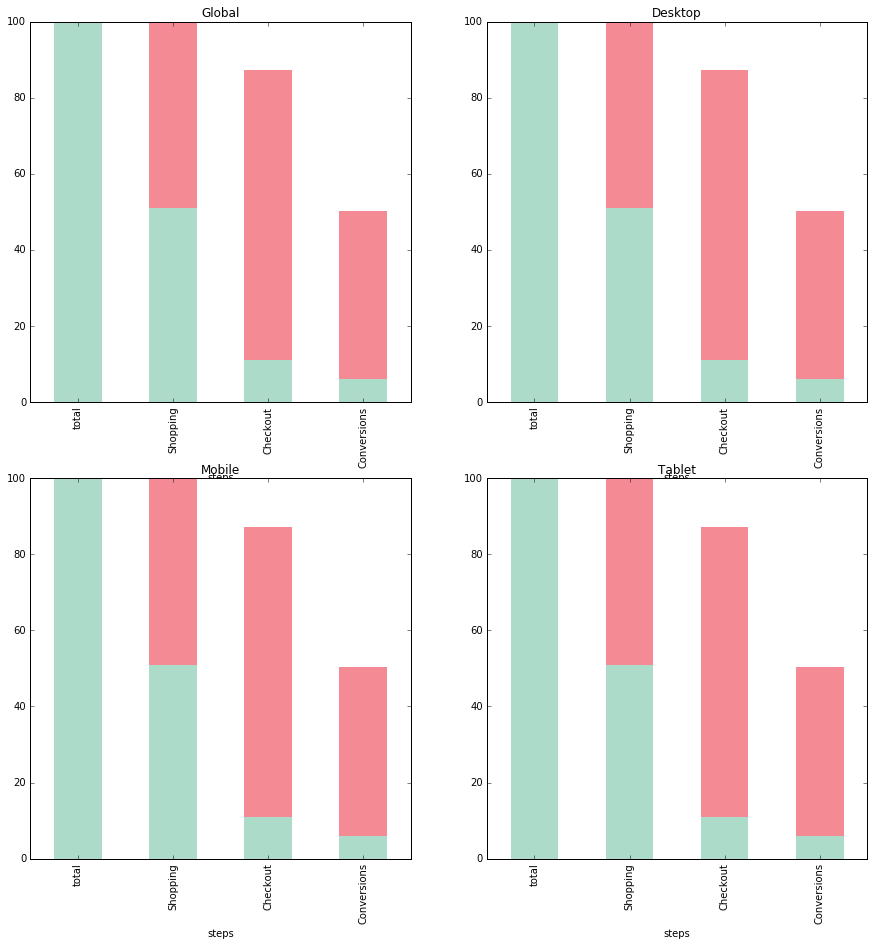

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(15,15))
pp = dd.unstack().plot(ax=axes[0,0],kind='bar',stacked=True,  color=['#ACDBC9','#F48B94'], title="Global", legend=False, edgecolor="none")
pp_d = dd_desktop.unstack().plot(ax=axes[0,1],kind='bar',stacked=True,  color=['#ACDBC9','#F48B94'], title="Desktop", legend=False, edgecolor="none")
pp_m = dd_mobile.unstack().plot(ax=axes[1,0],kind='bar',stacked=True,  color=['#ACDBC9','#F48B94'], title="Mobile", legend=False, edgecolor="none")
pp_t = dd_tablet.unstack().plot(ax=axes[1,1],kind='bar',stacked=True,  color=['#ACDBC9','#F48B94'], title="Tablet", legend=False, edgecolor="none")